<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_<br>
_Updated: B Rhodes (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb. This is a pandas project, with some visualizations.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

Explain your work where appropriate and be sure to comment any code you write.

**Grading:** For full credit you are required to answer all questions in the Basic, Intermediate and Advanced sections. You can get extra credit for completing all optional questions in these sections. The Bonus question is optional for everyone, so if you do only the Basic, Intermediate and Advanced sections you will get full credit.

## Basic level

In [1]:
#imports pandas and matplotlib (don't forget inline magic for matplotlib)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
# data file is on path 'data/imdb_1000.csv' 
imdb_df = pd.read_csv('data/imdb_1000.csv')

#### Check the number of rows and columns.

In [3]:
print('Number of rows is:',imdb_df.shape[0])
print('Number of columns is:',imdb_df.shape[1])

Number of rows is: 979
Number of columns is: 6


#### Check the data type of each column.

In [4]:
# Using the info method to get datatype for each column
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [5]:
# Calculate average by dividing the sum of durations by the number of observations
print("Average Duration of all movies is:" , round(imdb_df['duration'].sum()/len(imdb_df['duration']),2), "minutes.")

Average Duration of all movies is: 120.98 minutes.


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Sory by values on column durantion, then do a head and tail to get first and last row,
# finally get the movie names by list slicing
print("Shortest Movie:",imdb_df.sort_values(by=['duration'],axis=0).head(1)['title'].values[0])
print("Longest Movie:",imdb_df.sort_values(by=['duration'],axis=0).tail(1)['title'].values[0])

Shortest Movie: Freaks
Longest Movie: Hamlet


#### Create a histogram of duration, choosing an "appropriate" number of bins.

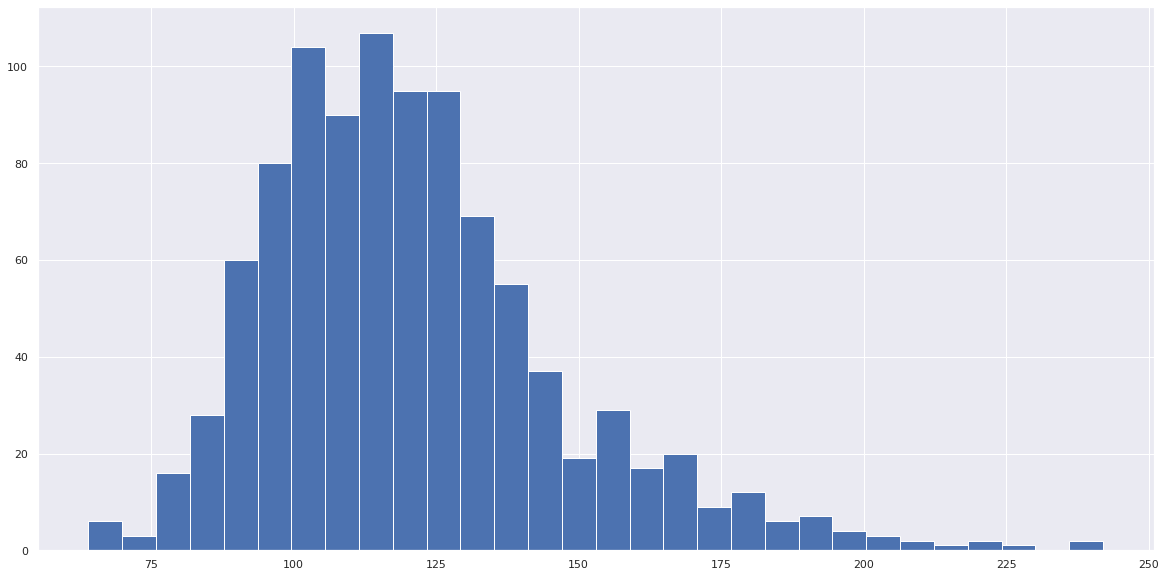

In [7]:
# Use the hist funtion on the dataframe to generate the plot
imdb_df["duration"].hist(bins=30, figsize=(20,10));

#### Use a box plot to display that same data.

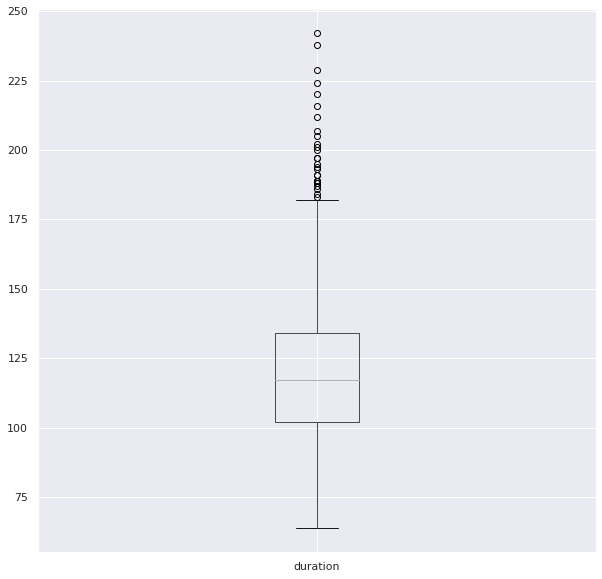

In [8]:
# Use the boxplot funtion on the dataframe to generate the plot, increase figsize
imdb_df.boxplot(["duration"],figsize=(10,10));

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
# Use value_counts to get a frequency distribution of the content rating column
imdb_df['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

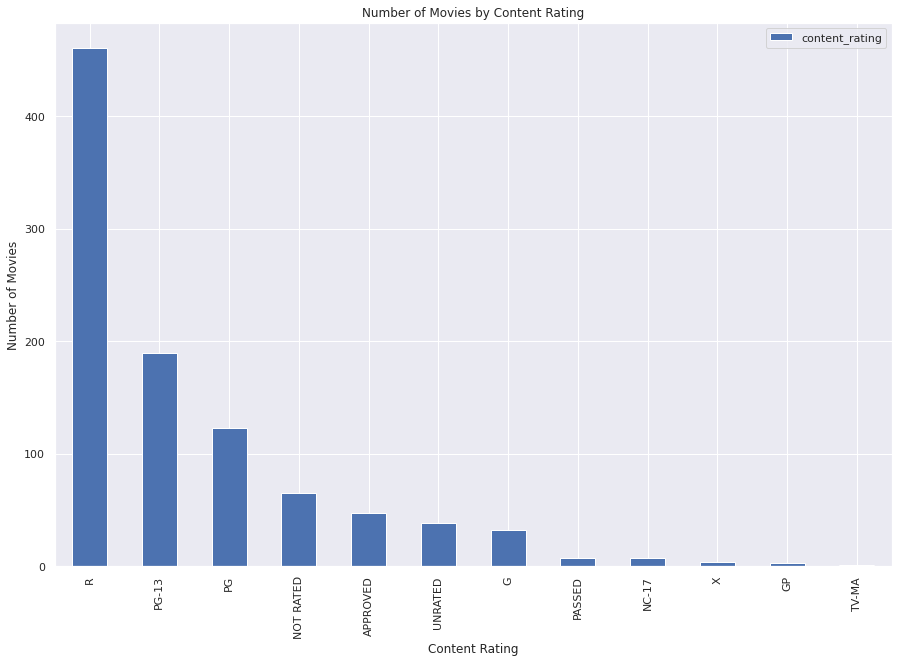

In [10]:
# Conver the output from value_counts into a DataFrame
# Then use a bar plot to visualize the relationship
content_rating_df = imdb_df['content_rating'].value_counts().reset_index()

content_rating_df.plot(kind='bar',
                       x='index',
                       y='content_rating',
                       title="Number of Movies by Content Rating",
                       xlabel='Content Rating',
                       ylabel='Number of Movies',
                       figsize=(15,10));

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [11]:
# Use apply and a lambda function to convert the values
imdb_df['content_rating'] = imdb_df['content_rating'].apply(lambda x : 'UNRATED' if x in ['NOT RATED','APPROVED','PASSED','GP'] else x)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [12]:
# Apply same approach as above
imdb_df['content_rating'] = imdb_df['content_rating'].apply(lambda x : 'NC-17' if x in ['X','TV-MA'] else x)

In [13]:
# Verifying if the above conversions worked!
imdb_df['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [14]:
# Use isna to count the number of missing values
imdb_df.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values. Explain your approach.

In [15]:
# content_rating has 3 missing observations
# We can use fillna to replace the missing with string "Missing"
imdb_df["content_rating"].fillna("Missing", inplace=True);

# Verify if the above code worked!
imdb_df.isna().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [16]:
# Create two dataframes - 
# 1. Greater than Equal to 120 minutes
# 2. Less than to 120 minutes
movies_ge_120 = imdb_df[imdb_df['duration'] >= 120]
movies_lt_120 = imdb_df[imdb_df['duration'] < 120]

print("Average Star Rating:")
print("Movies with Duration >=120 minuutes is",round(movies_ge_120['star_rating'].mean(),1))
print("Movies with Duration <120 minuutes is",round(movies_lt_120['star_rating'].mean(),1))

Average Star Rating:
Movies with Duration >=120 minuutes is 7.9
Movies with Duration <120 minuutes is 7.8


#### Use a visualization to detect whether there is a relationship between duration and star rating.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


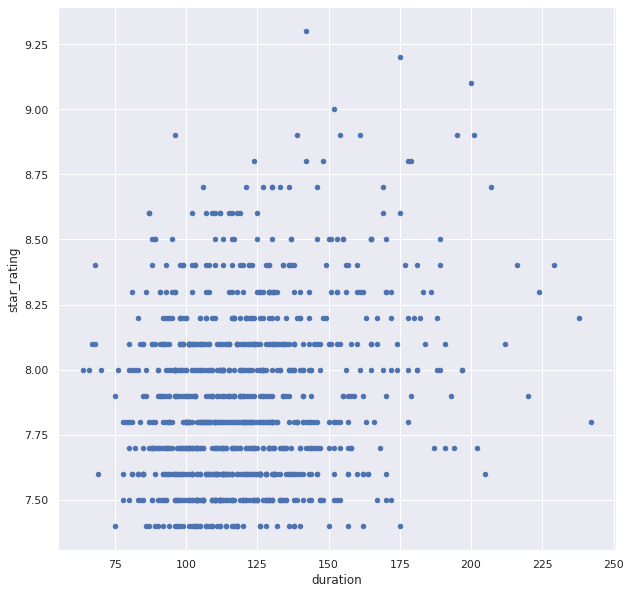

In [17]:
# Doesn't seem there is any relation between the two
# Most movies are in the lower left quadrant, duration < 150 minutes and rating < 8.5
imdb_df.plot.scatter(x='duration',y='star_rating', figsize=(10,10));

#### Calculate the average duration for each genre.

In [18]:
# Using groupby to calculate the average duration for each genre
imdb_df.groupby(by='genre')['duration'].mean().round(2).reset_index()

,genre,duration
0,Action,126.49
1,Adventure,134.84
2,Animation,96.60
3,Biography,131.84
4,Comedy,107.60
5,Crime,122.30
6,Drama,126.54
7,Family,107.50
8,Fantasy,112.00
9,Film-Noir,97.33


## Advanced level

#### Visualize the relationship between content rating and duration.

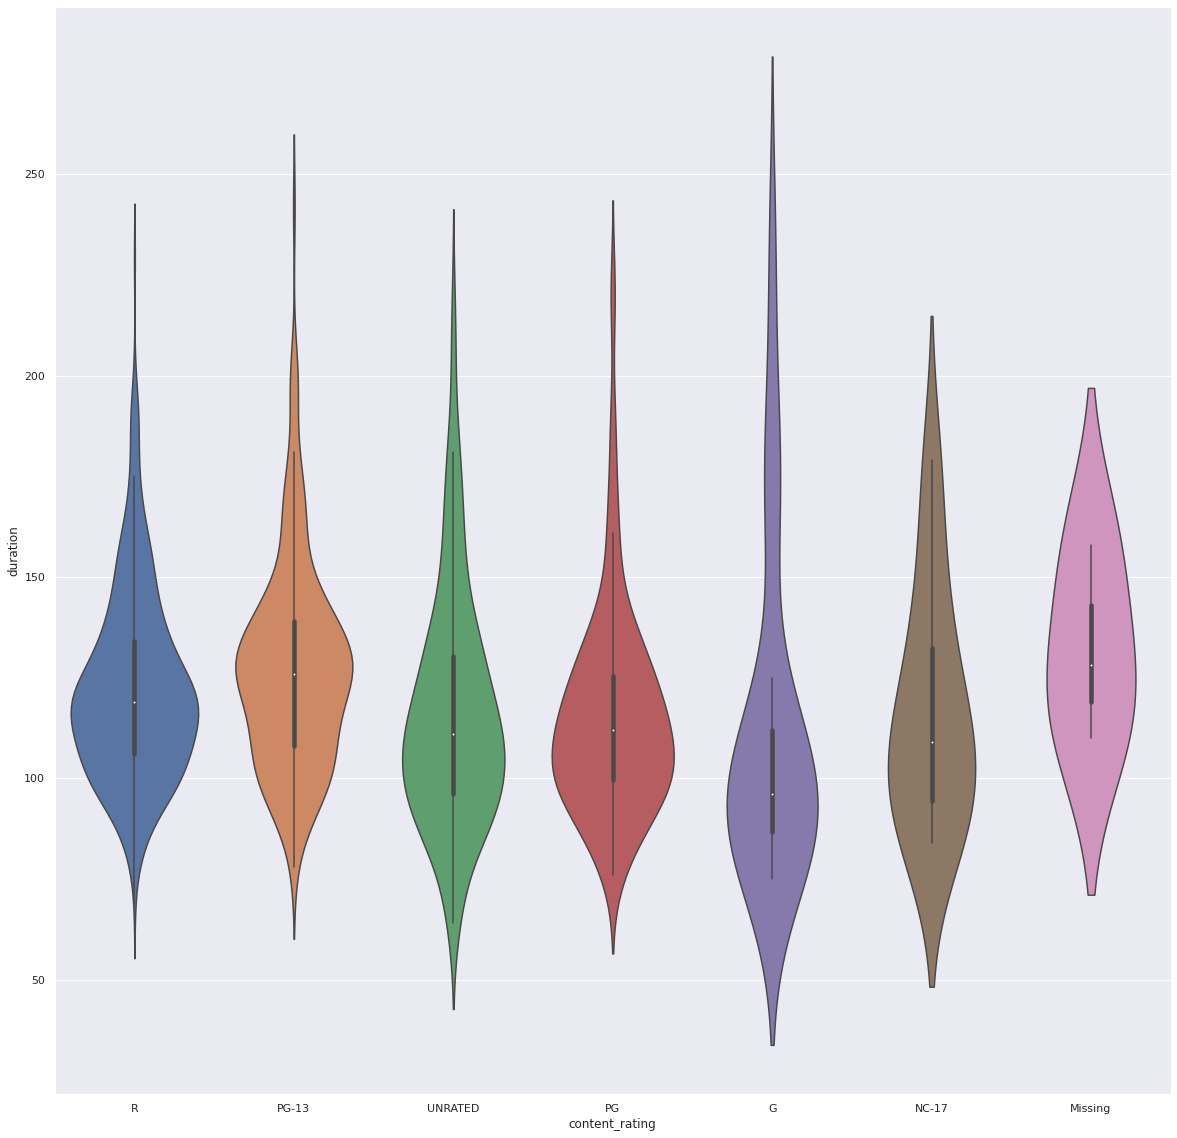

In [19]:
# Using Seaborm Violin plot to visualize the relation between the two
# First set up an axis using matplotlib to define a larger plotting area
# Then plotting the data using seaborn

fig, ax = plt.subplots(figsize=(20,20))

sns.violinplot(ax=ax,
               x="content_rating",
               y="duration",
               kind="box",
               data=imdb_df);




#### Determine the top rated movie (by star rating) for each genre.

In [20]:
# First use groupby to make a data frame grouped by the genre
grouped_by_genre = imdb_df.groupby(['genre'])

# Second use lambda function to sort the groups by star_rating in descending order
# and create another data frame
grouped_by_genre_sorted = grouped_by_genre.apply(lambda x : x.sort_values(['star_rating'],ascending=False))

# reset the index to convert into a data frame ignoring the index
final = grouped_by_genre_sorted.reset_index(drop=True)

# Finally do another group by and select first row of every group
final.groupby(['genre']).head(1).reset_index()[['genre','title','star_rating']]

,genre,title,star_rating
0,Action,The Dark Knight,9.0
1,Adventure,The Lord of the Rings: The Return of the King,8.9
2,Animation,Spirited Away,8.6
3,Biography,Schindler's List,8.9
4,Comedy,Life Is Beautiful,8.6
5,Crime,The Shawshank Redemption,9.3
6,Drama,12 Angry Men,8.9
7,Family,E.T. the Extra-Terrestrial,7.9
8,Fantasy,The City of Lost Children,7.7
9,Film-Noir,The Third Man,8.3


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [21]:
# Use the duplicated function to filter out rows which have more than 1 titles
duplicate_rows = imdb_df[imdb_df.duplicated(subset='title')]

# On examining the titles one by one and listing their information, 
# We observe that these are not actually duplicates
for title in duplicate_rows['title']:
    print(imdb_df[imdb_df['title'] == title][['title','genre','star_rating','duration']],"\n")

                               title  genre  star_rating  duration
466  The Girl with the Dragon Tattoo  Crime          7.9       158
482  The Girl with the Dragon Tattoo  Crime          7.8       152 

       title   genre  star_rating  duration
703  Dracula  Horror          7.6        85
905  Dracula  Horror          7.5       128 

              title  genre  star_rating  duration
678  Les Miserables  Drama          7.7       158
924  Les Miserables  Crime          7.5       134 

         title      genre  star_rating  duration
662  True Grit  Adventure          7.7       110
936  True Grit  Adventure          7.4       128 



#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [22]:
# Step 1: Manually create a list of genres

# Start by creating an empty list
list_ge_10 = []

# Next loop through different genres in the dataframe
# and if lenght of that genre is > 10
# add that genre to the list
for genre in imdb_df['genre'].unique():
    if len(imdb_df[imdb_df['genre'] == genre]) > 10:
        list_ge_10.append(genre)
        
print("List of Genres with at least 10 movies:",list_ge_10)

# Step 2: Filter the dataframe using the above list
filtered_df = imdb_df[imdb_df['genre'].isin(list_ge_10)]


# Step 3: Use Group By to get Average Star Rating
print("\n\nAverage Star Rating by Genre")
round(filtered_df.groupby('genre')['star_rating'].mean(),1)

List of Genres with at least 10 movies: ['Crime', 'Action', 'Drama', 'Adventure', 'Biography', 'Comedy', 'Animation', 'Mystery', 'Horror']


Average Star Rating by Genre


genre
Action       7.9
Adventure    7.9
Animation    7.9
Biography    7.9
Comedy       7.8
Crime        7.9
Drama        7.9
Horror       7.8
Mystery      8.0
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [23]:
# Save the Genres with value counts > 10 in a list
# Start with the data frame, get value counts > 10 to..
# create a list with the relevant genres
genre_10 = (imdb_df['genre'].value_counts() > 10).reset_index()
genre_list = list(genre_10[genre_10['genre'] == True]['index'])


# Now use the genre_list to again filter the DataFrame..
# And again apply group by and then mean of star_rating
imdb_df[imdb_df['genre'].isin(genre_list)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [24]:
# Get the Average Star Rating for all Genres using Group by
average_rating = pd.DataFrame(round(imdb_df.groupby('genre')['star_rating'].mean(),1).reset_index())

# Create a series with counts by genre > 10
genre_bool_series =  imdb_df['genre'].value_counts() > 10

# Sort the series alphabeticvally as our dataframe is also alphabetical
sorted_boolean_list = list(genre_bool_series.sort_index())

# Filter using the boolean list
average_rating[sorted_boolean_list]

,genre,star_rating
0,Action,7.9
1,Adventure,7.9
2,Animation,7.9
3,Biography,7.9
4,Comedy,7.8
5,Crime,7.9
6,Drama,7.9
11,Horror,7.8
12,Mystery,8.0


#### Option 4: aggregate by count and mean, then filter using the count

In [25]:
# Start by creating 2 dictionaries 
# One to store Genre and Counts
# One to store Genre and Sum of All Ratings 
dict_of_genres = {}
dict_of_rating = {}


# Loop through the Data Frame using its index
# Get the genre and the rating
for ind in imdb_df.index:
    current_genre = imdb_df['genre'][ind]
    current_rating = imdb_df['star_rating'][ind]
    
    # Start storing the genre and rating in the respective dictionaries
    # SUM UP if the entry is already there
    if current_genre in dict_of_genres.keys():
        dict_of_genres[current_genre] += 1
        dict_of_rating[current_genre] += current_rating
    else:
        dict_of_genres[current_genre] = 1
        dict_of_rating[current_genre] = current_rating
        
# Loop through the Genre Dictionary and for genres having count>10
# Calculate and display the mean
for genre in dict_of_genres.keys():
    if dict_of_genres[genre] > 10:
        print(genre,round(dict_of_rating[genre]/dict_of_genres[genre],1))

Crime 7.9
Action 7.9
Drama 7.9
Adventure 7.9
Biography 7.9
Comedy 7.8
Animation 7.9
Mystery 8.0
Horror 7.8


## Bonus

#### Figure out something "interesting" using the actors data!

In [26]:
# Create a list of all actors in the dataset
actors = []

for row in imdb_df.values:
    for actor in row[5].split(','):
        # Clean the actor names of all garbage characters
        clean_name = actor.replace("u'","").replace("',","").replace('[','').replace(']','').replace("'","")
        if clean_name[0] == ' ': # Remove the leading white space
            clean_name = clean_name[1:]
        actors.append(clean_name)
        
        actors = sorted(list(set(actors))) # Use set to dedup and then sort alphabetically

In [27]:
print("Unique actors in the dataset is:", len(actors))

Unique actors in the dataset is: 1777


In [28]:
# Create a function which take in an actor's name as an input
# Then calculates some stats based on the the dataset

def movie_stats_of_actor(actor=None):
    
    # declare empty lists to hold actor's data
    actor_movies = []
    actor_ratings = []
    genre_counts = []
    count = 0
    
    # fill in lists declared above with data about the selected actor
    for row in imdb_df.values:
        if actor in row[5]:
            count += 1
            actor_movies.append(row[1])
            actor_ratings.append(row[0])
            genre_counts.append(row[3])
        
    # Error checking    
    if count == 0:
        print("Actor Data Not Found in the dataset!")
        return
        
    # Calculate and display the stats based on the lists above
    print("Stats for Actor:",actor)
    print("Number of Movies:",count)
    print("List of Movies:",actor_movies)
    print("Average Star Rating:",round(sum(actor_ratings)/count,2))
    print("Genres they like:",set(genre_counts))

## Get Movie Stats of any Actor (from the dataset)

In [37]:
# Test the function which list stats for an actor
movie_stats_of_actor('Aamir Khan')

Stats for Actor: Aamir Khan
Number of Movies: 5
List of Movies: ['Taare Zameen Par', '3 Idiots', 'Rang De Basanti', 'Dil Chahta Hai', 'Lagaan: Once Upon a Time in India']
Average Star Rating: 8.4
Genres they like: {'Adventure', 'Comedy', 'Drama'}


In [30]:
# Test the function which list stats for an actor
movie_stats_of_actor('Liam Neeson')

Stats for Actor: Liam Neeson
Number of Movies: 5
List of Movies: ["Schindler's List", 'Taken', 'Ponyo', 'Love Actually', 'Les Miserables']
Average Star Rating: 7.94
Genres they like: {'Crime', 'Biography', 'Action', 'Animation', 'Comedy'}


In [31]:
# Modify the above function to return a list of the stats (instead of displaying them)

def calculate_movie_stats_of_actor(actor=None):
    
    # declare empty lists to hold actor's data
    actor_movies = []
    actor_ratings = []
    genre_counts = []
    count = 0
    
    # fill in lists declared above with data about the selected actor
    for row in imdb_df.values:
        if actor in row[5]:
            count += 1
            actor_movies.append(row[1])
            actor_ratings.append(row[0])
            genre_counts.append(row[3])
        
    # If number of moviers is less then 6 then do not return anything   
    if count < 5:
        return
    
    # Return a list of stats
    return [actor,count, actor_movies, round(sum(actor_ratings)/count,2) , set(genre_counts)]

In [32]:
# Create a list based on Actors (with minimumn 5 movies)
# By calling the above function "calculate_movie_stats_of_actor"
# and passing the list of all actors 

actor_stats = []

for actor in actors:
    if calculate_movie_stats_of_actor(actor) != None:
        actor_stats.append(calculate_movie_stats_of_actor(actor))

In [33]:
# Convert the actor stats list into a DataFrame
actor_stats_df = pd.DataFrame(actor_stats[:],columns=['Actor','Movie_Count','Movie_Names','Average_Rating','Favorite_Genres'])

In [34]:
# Check the Data Frame
actor_stats_df.head(10)

,Actor,Movie_Count,Movie_Names,Average_Rating,Favorite_Genres
0,Aamir Khan,5,"[Taare Zameen Par, 3 Idiots, Rang De Basanti, ...",8.40,"{Adventure, Comedy, Drama}"
1,Al Pacino,13,"[The Godfather, The Godfather: Part II, Scarfa...",8.11,"{Crime, Biography, Action, Drama}"
2,Alec Baldwin,5,"[Glengarry Glen Ross, The Hunt for Red October...",7.56,"{Action, Comedy, Drama}"
3,Anthony Hopkins,6,"[The Silence of the Lambs, The Elephant Man, T...",7.93,"{Biography, Drama, Horror}"
4,Audrey Hepburn,5,"[Roman Holiday, Charade, My Fair Lady, Breakfa...",7.92,"{Comedy, Drama}"
5,Bill Murray,5,"[Groundhog Day, Fantastic Mr. Fox, Ghostbuster...",7.84,"{Comedy, Drama, Animation}"
6,Brad Pitt,14,"[Fight Club, Se7en, Snatch., Inglourious Baste...",7.92,"{Crime, Biography, Action, Mystery, Adventure,..."
7,Bruce Willis,8,"[Die Hard, The Sixth Sense, Sin City, Twelve M...",7.90,"{Crime, Action, Mystery, Adventure, Drama}"
8,Cary Grant,8,"[North by Northwest, Notorious, Arsenic and Ol...",8.05,"{Comedy, Drama, Adventure, Mystery}"
9,Cate Blanchett,7,"[How to Train Your Dragon 2, The Curious Case ...",7.64,"{Biography, Animation, Drama}"


## Top 5 Actors by Number of Movies (in this dataset)

In [35]:
# Sort by values to get top 5 actors by number of movies
actor_stats_df.sort_values('Movie_Count',ascending=False).head(5)

,Actor,Movie_Count,Movie_Names,Average_Rating,Favorite_Genres
64,Robert De Niro,18,"[The Godfather: Part II, Goodfellas, Once Upon...",8.04,"{Crime, Biography, Sci-Fi, Action, Drama, Adve..."
79,Tom Hanks,14,"[Forrest Gump, Saving Private Ryan, The Green ...",8.01,"{Crime, Biography, Action, Animation, Drama, A..."
6,Brad Pitt,14,"[Fight Club, Se7en, Snatch., Inglourious Baste...",7.92,"{Crime, Biography, Action, Mystery, Adventure,..."
12,Clint Eastwood,14,"[The Good, the Bad and the Ugly, For a Few Dol...",7.94,"{Action, Crime, Drama, Western}"
1,Al Pacino,13,"[The Godfather, The Godfather: Part II, Scarfa...",8.11,"{Crime, Biography, Action, Drama}"


## Top 5 Actors by Average Star Rating (criteria of minimum 5 movies)

In [36]:
# Sort by values to get top 5 actors by by average rating
actor_stats_df.sort_values('Average_Rating',ascending=False).head(5)

,Actor,Movie_Count,Movie_Names,Average_Rating,Favorite_Genres
10,Charles Chaplin,5,"[City Lights, Modern Times, The Great Dictator...",8.48,"{Comedy, Adventure}"
0,Aamir Khan,5,"[Taare Zameen Par, 3 Idiots, Rang De Basanti, ...",8.40,"{Adventure, Comedy, Drama}"
19,Elijah Wood,5,[The Lord of the Rings: The Return of the King...,8.30,"{Crime, Comedy, Adventure}"
50,Kevin Spacey,6,"[The Usual Suspects, Se7en, American Beauty, L...",8.27,"{Crime, Drama}"
35,Ian McKellen,8,[The Lord of the Rings: The Return of the King...,8.20,"{Action, Adventure}"
